# Using iris dataset perform knn and compare with logistic regression

In [52]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt


In [53]:
from sklearn.datasets import load_iris
iris = load_iris()
print(iris.data.shape)


(150, 4)


In [54]:
iris.DESCR

'.. _iris_dataset:\n\nIris plants dataset\n--------------------\n\n**Data Set Characteristics:**\n\n    :Number of Instances: 150 (50 in each of three classes)\n    :Number of Attributes: 4 numeric, predictive attributes and the class\n    :Attribute Information:\n        - sepal length in cm\n        - sepal width in cm\n        - petal length in cm\n        - petal width in cm\n        - class:\n                - Iris-Setosa\n                - Iris-Versicolour\n                - Iris-Virginica\n                \n    :Summary Statistics:\n\n    ============== ==== ==== ======= ===== ====================\n                    Min  Max   Mean    SD   Class Correlation\n    ============== ==== ==== ======= ===== ====================\n    sepal length:   4.3  7.9   5.84   0.83    0.7826\n    sepal width:    2.0  4.4   3.05   0.43   -0.4194\n    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)\n    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)\n    ============== ==== =

In [55]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [56]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [57]:
df = pd.DataFrame(iris.data)
df.head()

,0,1,2,3
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [58]:
iris.data

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [59]:
iris.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [60]:
df.columns = iris.feature_names

In [61]:
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [62]:
df.shape

(150, 4)

In [63]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(iris.data, iris.target, stratify = iris.target, random_state = 2, test_size = 0.3)


In [64]:
from sklearn.preprocessing import StandardScaler 
from sklearn.linear_model import LogisticRegression
st_x= StandardScaler()    
X_train= st_x.fit_transform(X_train)    
X_test= st_x.transform(X_test) 

classifier= LogisticRegression()

# fit the model with data
classifier.fit(X_train,y_train)

#
y_pred=classifier.predict(X_test)


In [65]:
df=pd.DataFrame() 
df['y_test'] = y_test
df['y_pred'] = y_pred
df.head()


,y_test,y_pred
0,1,1
1,0,0
2,0,0
3,0,0
4,1,1


In [66]:
from sklearn.metrics import accuracy_score
print("Accuracy of test set=",accuracy_score(y_test, y_pred)*100)


Accuracy of test set= 100.0


In [67]:
from sklearn.metrics import confusion_matrix


In [68]:
cm = (confusion_matrix(y_test,y_pred))


In [69]:
cm 

array([[15,  0,  0],
       [ 0, 15,  0],
       [ 0,  0, 15]], dtype=int64)

In [70]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=5,metric = 'minkowski',p = 2)
classifier.fit(X_train,y_train)
y_pred = classifier.predict(X_test)


In [71]:
from sklearn.metrics import confusion_matrix
cm =confusion_matrix(y_test,y_pred)


In [72]:
cm

array([[15,  0,  0],
       [ 0, 14,  1],
       [ 0,  0, 15]], dtype=int64)

In [73]:
from sklearn.metrics import accuracy_score
Accuracy_score = (accuracy_score(y_test,y_pred)*100)

In [74]:
print(f"Accuracy{Accuracy_score:6.2f}")

Accuracy 97.78


In [75]:
error = []

for i in range(1,40):
    knn=KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    y_pred=knn.predict(X_test)
    error.append(np.mean(y_pred!=y_test)) 


In [76]:
print(error)

[0.022222222222222223, 0.022222222222222223, 0.022222222222222223, 0.022222222222222223, 0.022222222222222223, 0.022222222222222223, 0.022222222222222223, 0.0, 0.022222222222222223, 0.022222222222222223, 0.022222222222222223, 0.0, 0.022222222222222223, 0.022222222222222223, 0.022222222222222223, 0.022222222222222223, 0.022222222222222223, 0.022222222222222223, 0.022222222222222223, 0.022222222222222223, 0.0, 0.022222222222222223, 0.022222222222222223, 0.022222222222222223, 0.022222222222222223, 0.022222222222222223, 0.022222222222222223, 0.022222222222222223, 0.022222222222222223, 0.06666666666666667, 0.06666666666666667, 0.06666666666666667, 0.06666666666666667, 0.06666666666666667, 0.06666666666666667, 0.06666666666666667, 0.06666666666666667, 0.08888888888888889, 0.08888888888888889]


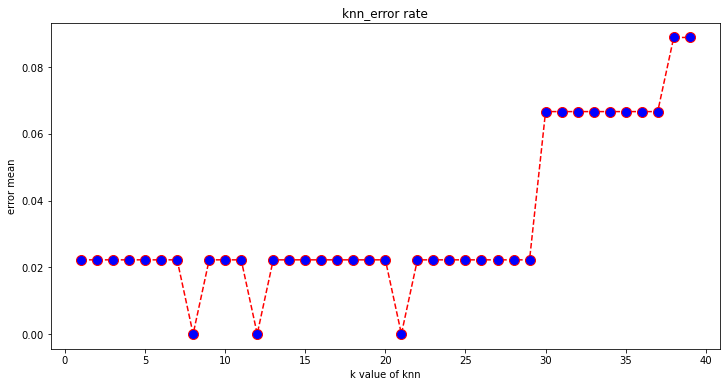

In [77]:
plt.figure(figsize=(12,6))
plt.plot(range(1,40),error,color = "red",linestyle = '--',marker='o',markerfacecolor = 'blue',markersize = 10)
plt.title('knn_error rate')
plt.xlabel('k value of knn')
plt.ylabel('error mean')
plt.show()

##  Conclusion: 
### 1)k = 5 neigbors is best optimal from the above graph
### 2) But iris dataset got more accuracy in logistic regression compared to the kneigborsclassifer algorithm.
### 3) so knn algorithm is not best for the iris dataset 
